In [70]:
import json
import pandas as pd
from matplotlib import pylab as plt
import numpy as np

In [2]:
with open('data/news.json', "r", encoding="utf_8_sig") as news_json:
    data = json.loads(news_json.read())

In [3]:
df = pd.read_excel('data/dataset_news_1.xlsx')


In [4]:
def get_news_id_from_url(url: str) -> int:
    """
    Вычленить id из url
    """
    parts = url.split('/')
    try:
        if parts[-2] == '9468':
            print(url)
        return int(parts[-2])
    except Exception as err:
        print(url)
        for part in parts:
            if '073' in part:  # Опытным путем выявлено, что битые урлы
                # только для типа 073, поэтому просто решила вытащить такие
                return int(part)
        print("it is not news url ", url)
        return 0


def get_news_type(news_id: int) -> str:
    """
    Ради понимания структуры данных, получить тип новости из id,
    также найти ошибочные id (нашла таких 3 штуки)
    """
    if str(news_id)[-3:] == '073':
        return "news"
    if str(news_id)[-3:] == '050':
        return "major"
    else:
        print(news_id)
        return "error"

In [5]:
df['news_id'] = df['url_clean'].apply(get_news_id_from_url)
df['news_type'] = df['news_id'].apply(get_news_type)

mos.ru/news/item/89421073/ /
mos.ru/news/item/9468/
mos.ru/news/item/94670073/ /
mos.ru/news/item/94501073/душ/
mos.ru/news/item/89957073/ Их/
mos.ru/news/item/94852073/%5c/
mos.ru/news/item/94479073/ (https:/app.aif.ru/owa/redir.aspx/
mos.ru/news/item/94792073/ /
mos.ru/news/item/94897073/+/
mos.ru/news/item/94953073/ /
mos.ru/news/item/91919073/-/
9514707
9468


In [6]:
df_json = pd.read_json('data/news.json', encoding="utf_8_sig")  # Закинем json в df
df_json["news_type"] = df_json['id'].apply(get_news_type)

In [7]:
df_merge = df.merge(df_json, left_on='news_id', right_on='id')

In [8]:
df_merge.head()

,date_time,url_clean,user_id,news_id,news_type_x,id,title,importance,published_at,created_at,...,territory_area_id,territory_district_id,preview_text,full_text,url,preview,text,promo,images,news_type_y
0,2021-08-01 18:51:19,mos.ru/news/item/94006073/,1,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news
1,2021-08-04 13:08:19,mos.ru/news/item/94006073/,2,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news
2,2021-08-29 12:40:07,mos.ru/news/item/94006073/,3,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news
3,2021-08-02 09:04:55,mos.ru/news/item/94006073/,6,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news
4,2021-08-02 17:16:23,mos.ru/news/item/94006073/,11,94006073,news,94006073,Дома-порталы: где в Москве можно почувствовать...,,2021-08-01 09:04:00,2021-07-30 07:29:53,...,1501.0,1500.0,"Распутываем лепные кружева, ищем кошку на эрке...",<p>Если во время прогулки по Москве внимательн...,/news/item/94006073/,NaN,NaN,NaN,NaN,news


In [176]:
df_merge['view_to_pub'] = df_merge.date_time - df_merge.published_at
df_merge['view_to_pub_days'] = df_merge['view_to_pub'].apply(lambda x: x.days)
df_merge[df_merge['view_to_pub_days'] < 0]

,date_time,url_clean,user_id,news_id,news_type_x,id,title,importance,published_at,created_at,...,url,preview,text,promo,images,news_type_y,timedelta_passed,days_passed,view_to_pub,view_to_pub_days
9256,2021-08-24 17:01:56,mos.ru/news/item/95079073/,255,95079073,news,95079073,Москвичи стали чаще записываться к врачам поли...,,2021-08-27 07:02:00,2021-08-24 16:49:32,...,/news/item/95079073/,NaN,NaN,NaN,NaN,news,55 days 05:58:01.506144,55,-3 days +09:59:56,-3
11633,2021-08-24 17:02:22,mos.ru/news/item/95075073/,255,95075073,news,95075073,На mos.ru заработал сервис проверки статуса за...,,2021-08-25 10:16:03,2021-08-24 16:21:42,...,/news/item/95075073/,NaN,NaN,NaN,NaN,news,57 days 02:43:58.531107,57,-1 days +06:46:19,-1


<AxesSubplot:>

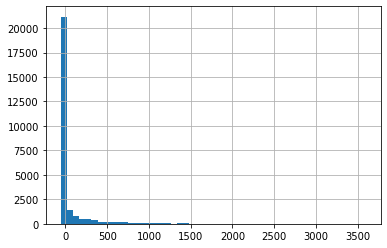

In [161]:
df_merge['view_to_pub_days'].hist(bins=50)

In [177]:
df_json['views'] = df_json['id'].apply(lambda x: df.news_id[df.news_id == x].count())
df_json['timedelta_passed'] = df_json.published_at.apply(lambda x: pd.Timestamp.now() - x)
df_json['days_passed'] = df_json.timedelta_passed.apply(lambda x: x.days - 50)

In [178]:
df_json.views.describe()

count    6554.000000
mean        4.034483
std         8.167540
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        71.000000
Name: views, dtype: float64

<AxesSubplot:>

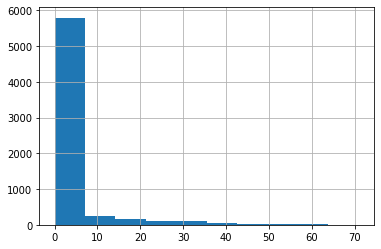

In [179]:
df_json.views.hist()

<AxesSubplot:>

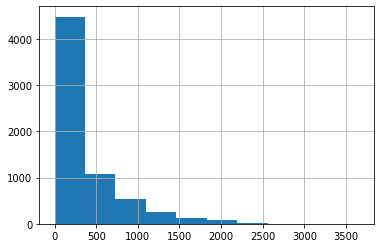

In [180]:
df_json['days_passed'].hist()

In [181]:
df_json['days_passed'].describe()

count    6554.000000
mean      341.380226
std       424.828316
min         0.000000
25%        48.000000
50%       169.000000
75%       458.000000
max      3655.000000
Name: days_passed, dtype: float64

In [190]:
df_json['rank'] = df_json.views / (df_json.days_passed + 1)**(1/2)

In [191]:
df_json['rank'].describe()

count    6554.000000
mean        0.792184
std         2.003163
min         0.000000
25%         0.041065
50%         0.087580
75%         0.353553
max        17.815723
Name: rank, dtype: float64

In [188]:
df_json['rank'].sort_values().tail(20)

1174    12.392766
369     12.578842
467     12.611853
1406    12.927894
6175    13.000000
5950    13.095801
4395    13.339459
6448    13.581995
2410    13.590155
6268    13.676318
3912    13.750000
3435    13.761951
5775    14.309602
6073    14.495689
6059    14.500000
2673    14.552138
6086    14.804523
1956    15.500000
2492    16.918356
6490    17.815723
Name: rank, dtype: float64

In [189]:
df_json.sort_values('rank').tail(10)

,id,title,importance,published_at,created_at,updated_at,is_deferred_publication,status,ya_rss,active_from,...,url,preview,text,promo,images,news_type,views,timedelta_passed,days_passed,rank
3912,94705073,«Миллион призов»: москвичи смогут направить вы...,,2021-08-17 07:01:05,2021-08-16 21:51:18,2021-08-17 11:42:28,0.0,public,1,NaN,...,/news/item/94705073/,NaN,NaN,NaN,NaN,news,55,65 days 07:13:47.651221,15,13.750000
3435,94417073,В Москве начала работать онлайн-платформа «Кар...,,2021-08-10 07:03:00,2021-08-09 20:59:29,2021-09-10 15:46:04,0.0,public,1,NaN,...,/news/item/94417073/,NaN,NaN,NaN,NaN,news,66,72 days 07:11:52.646582,22,13.761951
5775,7572050,Большой Каменный мост полностью открыт после к...,NaN,2021-08-16 13:16:00,2021-08-16 12:49:05,2021-08-16 21:24:34,NaN,public,1,NaN,...,/mayor/themes/4299/7572050/,"Работы длились 14 месяцев, причем без остановк...",<p>В Москве после капитального ремонта открыт&...,0.0,"[{'id': 3273241281, 'title': 'Фото М. Мишина. ...",major,59,66 days 00:58:52.669392,16,14.309602
6073,7585050,Учебный год в московских школах начнется в очн...,NaN,2021-08-24 14:38:00,2021-08-24 14:32:18,2021-08-26 09:45:58,NaN,public,1,NaN,...,/mayor/themes/15299/7585050/,Мэр Москвы обсудил с педагогами итоги прошедше...,"<p class=""p1""><a href=""https://www.mos.ru/mayo...",0.0,"[{'id': 3293594281, 'title': 'Фото В. Новикова...",major,41,57 days 23:36:52.672354,7,14.495689
6059,7574050,Сергей Собянин рассказал о развитии электротра...,NaN,2021-08-17 09:06:00,2021-08-16 21:07:03,2021-08-17 09:59:40,NaN,public,1,NaN,...,/mayor/themes/2299/7574050/,До конца года столица планирует закупить еще 3...,<p>Сегодня на улицы столицы вышел 700-й электр...,0.0,"[{'id': 3275150281, 'title': '', 'copyright': ...",major,58,65 days 05:08:52.672222,15,14.500000
2673,94634073,Кинопоказы на подводной лодке и уроки итальянс...,,2021-08-16 07:01:00,2021-08-13 19:35:59,2021-08-16 07:00:15,0.0,public,1,NaN,...,/news/item/94634073/,NaN,NaN,NaN,NaN,news,60,66 days 07:13:52.639002,16,14.552138
6086,7557050,Открытие станции «Кунцевская» БКЛ улучшит тран...,NaN,2021-08-09 16:13:00,2021-08-09 15:47:58,2021-08-09 21:57:36,NaN,public,1,NaN,...,/mayor/themes/2299/7557050/,Это позволит снизить нагрузку на Арбатско-Покр...,<p>На западе столицы появится крупный транспор...,0.0,"[{'id': 3254015281, 'title': 'Пресс-служба Мэр...",major,71,72 days 22:01:52.672476,22,14.804523
1956,94702073,Москва поднялась на четыре позиции в рейтинге ...,,2021-08-17 09:01:00,2021-08-16 20:57:51,2021-08-17 09:00:05,0.0,public,1,NaN,...,/news/item/94702073/,NaN,NaN,NaN,NaN,news,62,65 days 05:13:52.632029,15,15.500000
2492,94849073,Более 120 культурных площадок Москвы приглашаю...,,2021-08-19 14:46:00,2021-08-19 14:18:44,2021-08-20 16:47:06,0.0,public,1,NaN,...,/news/item/94849073/,NaN,NaN,NaN,NaN,news,61,62 days 23:28:52.637277,12,16.918356
6490,7575050,Правительство Москвы рассмотрит проекты компле...,NaN,2021-08-17 15:41:00,2021-08-17 15:33:35,2021-08-17 15:40:12,NaN,public,1,NaN,...,/mayor/themes/4299/7575050/,Реализация этих проектов позволит создать окол...,<p>В этом году все проекты комплексного развит...,0.0,"[{'id': 3276939281, 'title': 'Проектное решени...",major,69,64 days 22:33:52.676421,14,17.815723


In [195]:
df_json[df_json['days_passed'] < 3].sort_values('views').tail()

,id,title,importance,published_at,created_at,updated_at,is_deferred_publication,status,ya_rss,active_from,...,url,preview,text,promo,images,news_type,views,timedelta_passed,days_passed,rank
4352,95280073,Вакцинированные доноры могут сдать плазму с ан...,,2021-08-30 07:02:03,2021-08-29 15:41:11,2021-08-30 07:01:32,0.0,public,1,NaN,...,/news/item/95280073/,NaN,NaN,NaN,NaN,news,7,52 days 07:12:49.655563,2,4.041452
6121,7612050,Сергей Собянин снизил стоимость проезда в обще...,NaN,2021-08-30 09:13:00,2021-08-29 10:39:18,2021-08-30 09:12:19,NaN,public,1,NaN,...,/mayor/themes/2299/7612050/,Это позволит экономить на регулярных поездках ...,<p>В столице с 1 сентября отменят оплату проез...,0.0,"[{'id': 3304725281, 'title': '', 'copyright': ...",major,7,52 days 05:01:52.672801,2,4.041452
396,95282073,Акция по чипированию домашних животных начнетс...,,2021-08-30 07:05:02,2021-08-29 16:07:59,2021-08-30 07:04:01,0.0,public,1,NaN,...,/news/item/95282073/,NaN,NaN,NaN,NaN,news,7,52 days 07:09:50.616620,2,4.041452
2241,95281073,Три золотые медали завоевали москвичи на Европ...,,2021-08-30 07:04:01,2021-08-29 16:03:24,2021-08-30 07:03:43,0.0,public,1,NaN,...,/news/item/95281073/,NaN,NaN,NaN,NaN,news,8,52 days 07:10:51.634802,2,4.618802
2069,95239073,Чат-боты и машинное зрение: идет прием заявок ...,,2021-08-30 07:07:00,2021-08-27 14:15:55,2021-08-30 07:06:19,0.0,public,1,NaN,...,/news/item/95239073/,NaN,NaN,NaN,NaN,news,12,52 days 07:07:52.633144,2,6.928203


In [194]:
df_json[df_json['days_passed'] == 0].views.unique()

array([0, 1])